
📊 Top 20 Root Domains for phishing
000webhostapp                  336
pastehtml                      309
beget                          93
id8-eu                         71
eu-id3                         64
srv-woa1                       50
id-app7                        49
blogspot                       48
0                              45
naylorantiques                 37
google                         37
esy                            28
ovh                            28
bimabn                         28
littlematchagirl               24
comcast                        24
civpro                         24
soydg                          23
myjino                         22
altervista                     19


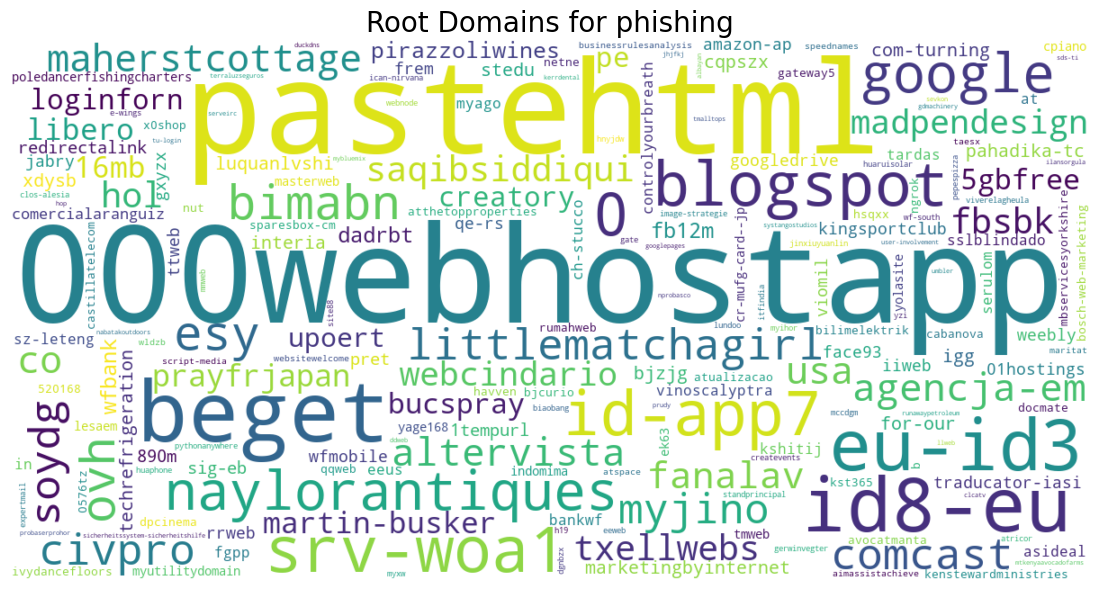


📊 Top 20 Root Domains for benign
wikipedia                      325
facebook                       236
youtube                        212
blogspot                       190
amazon                         148
linkedin                       137
yahoo                          133
mylife                         86
myspace                        85
imdb                           80
go                             72
ancestry                       59
wn                             59
answers                        58
manta                          55
wordpress                      53
absoluteastronomy              51
wikia                          49
twitter                        47
pipl                           45


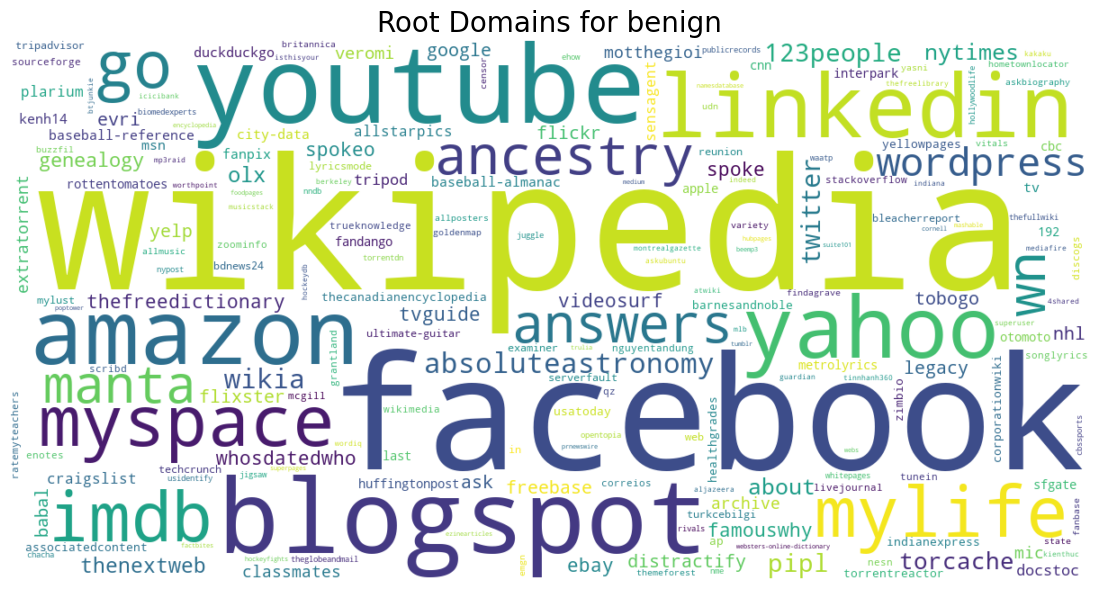


📊 Top 20 Root Domains for defacement
sikobv                         25
rendeck                        23
allaroundrental                22
bruynzeelmultipanel            21
javadoplant                    20
aquamarinadivingtenerife       20
nichost                        20
zibae                          19
musimagen                      19
prefina                        18
szgs                           17
ninopizzaria                   17
werderfan-fahrten              17
patrikcase                     17
expatsalon                     17
keokukyachtclub                17
iremshrine                     17
beriva                         17
saludyestetica                 17
kidscentrale                   17


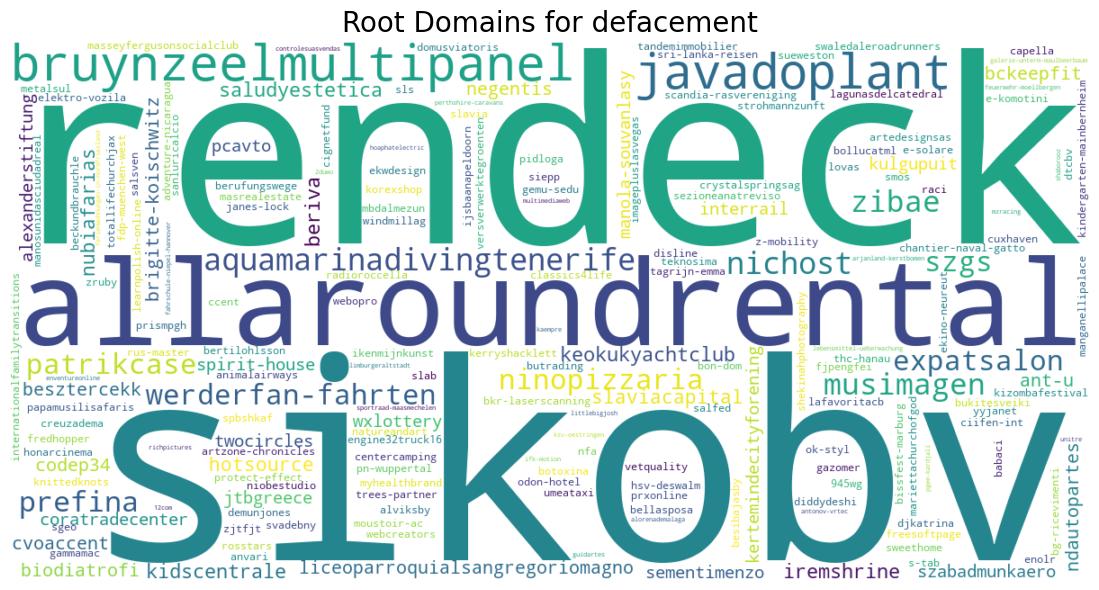


📊 Top 20 Root Domains for malware
0                              3819
toulousa                       500
mixh                           469
9779                           390
apbfiber                       319
pastebin                       299
spdtextile                     253
lovettz                        81
grasslandhotel                 79
3cf                            79
mp3-pesnja                     70
chinesevie                     64
live                           63
polska                         55
google                         54
hotlinegsm                     53
wxztjz                         49
pubyun                         37
isikpandizot                   34
troikacapital                  32


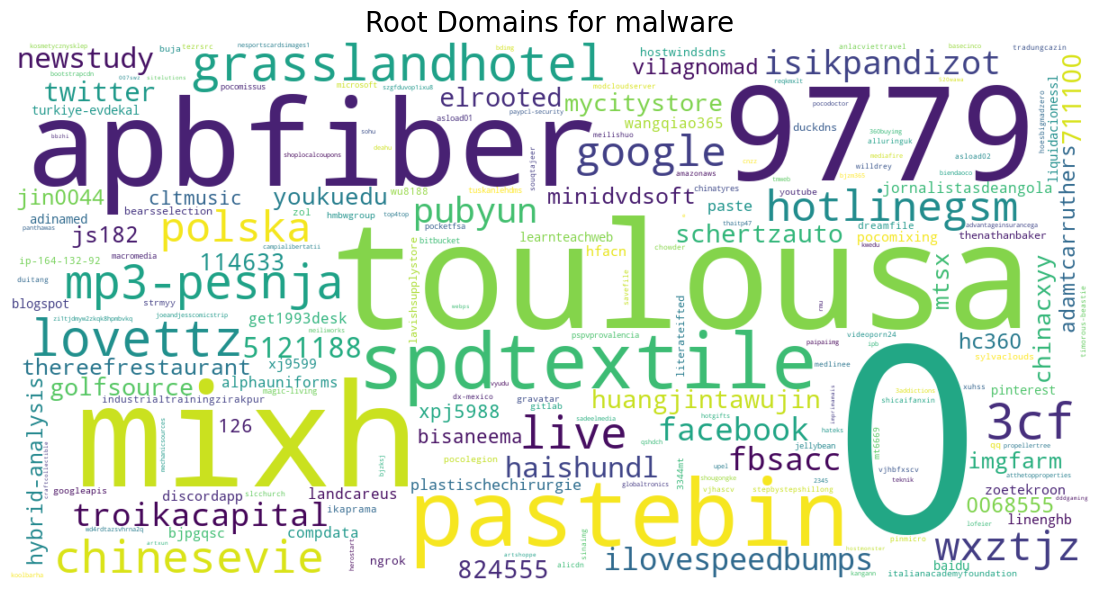

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 1. CSV 파일 불러오기
df = pd.read_csv('../data/balanced_random_40K_test3.csv')

# 2. 결측값 제거
df = df[['type', 'root_domain']].dropna()

# 3. type별 그룹 반복
types = df['type'].unique()

for t in types:
    # 4. 해당 type의 root_domain 리스트 추출
    domains = df[df['type'] == t]['root_domain'].tolist()

    # 5. 공백으로 연결된 문자열 생성
    text = ' '.join(domains)

    # 6. 단어별 카운트 계산
    word_counts = Counter(text.split())

    # 👉 상위 20개 도메인만 출력
    top_20 = word_counts.most_common(20)
    print(f"\n📊 Top 20 Root Domains for {t}")
    for word, count in top_20:
        print(f"{word:<30} {count}")

    # 7. 워드클라우드 생성
    wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(word_counts)

    # 8. 시각화
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Root Domains for {t}", fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
